# Vienna's population and its migration backgrounds from a cultural studies point of view
### An exploratory, critical analysis of open population data with a focus on graphical displays
### created by Antonia Saske, submission date: 04 February 2022

## Introducing the central data
The central data set depicts the population structure of Vienna from 2011 on by applying the categories of migration background and gender. It is a register-based representation, having been curated by the Viennese magistrate for economics, labour and statistics. This data set, in the form of a .csv-file, shows information on the city's districts and offers nationality attributes for the registered population. At first sight, information on the relation between districts and cultural structures as well as longer-term tendencies of migration processes in Vienna seem plausibly extractable.

>Data set: Magistrat Wien – Magistratsabteilung 23 – Wirtschaft, Arbeit und Statistik (2011, updated yearly): *Population in 250 sub-districts in Vienna by migration background, age and sex since 2011*. Stadt Wien. UUID: 15516cf5-09c1-4e69-acf8-3d43183dd026. Access via Open Data Österreich. URL: https://www.data.gv.at/katalog/dataset/15516cf5-09c1-4e69-acf8-3d43183dd026 [19.01.2022].

The data is openly accessible via the *Open Data Österreich* catalogue, where numerous data collections, many of them coming from public instances, are available. In case of the central data set for this analysis, the corresponding webpage offers both extensive meta data and explanatory guidelines for the file-specific attributes. The file itself is divided into columns describing locality (from state classification to Viennese sub-districts) and columns for nationalites including the "non-migrant" Austrian population and a total population count. Finally, there is a referential date closing off each row, assigning the year of data collection.

In this analysis, the central data set of Vienna’s population overall serves as an object of study in order to question if the applied category of migration background leads to a distortion of cultural and social processes by separating migrant questions from the superordinate context – while also seriously considering the given articulateness of the data. After this brief contextualisation, now follow insights into the data set and additional thoughts on the functionality of combining a cultural research research question with computational tools. Since there is a particular focus on graphical displays, the research intent is approached through a primarily visual lense.

In [6]:
#Setting working directory and importing necessary packages
import os
os.chdir("C:/collec/tam")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify
from pyvis import network as net
import networkx as nx

#Converting the central data to a data frame and cleaning the data
vie_pop = pd.read_csv("vie_pop.csv", delimiter = ";", header = 1)
vie_pop = vie_pop.drop(columns = "NUTS1")
vie_pop = vie_pop.drop(columns = "NUTS2")
vie_pop = vie_pop.drop(columns = "NUTS3")
vie_pop["REF_DATE"] = pd.to_datetime(vie_pop["REF_DATE"], format = "%Y%m%d")
district_simple = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13",
                                                             "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"]
vie_pop["DISTRICT_CODE"] = vie_pop["DISTRICT_CODE"].replace([90100, 90200, 90300, 90400, 90500, 90600, 90700, 90800, 90900, 91000, 91100, 91200, 91300,
                                                             91400, 91500, 91600, 91700, 91800, 91900, 92000, 92100, 92200, 92300], district_simple)
#Colour palette
PiYG = ["#8e0152", "#c51b7d", "#de77ae", "#f1b6da", "#fde0ef", "#f7f7f7","#e6f5d0", "#b8e186", "#7fbc41"]

## Graphical displays
### Yearly development of Vienna's population
The first graphical display encorperates a simple, yet fundamental take on the data set: portraying the yearly development of Vienna's population count. This overview shows the total population from 2008 to 2020. Even though the years *2008*, *2009* and *2010* are not officially listed as part of the data set, according population counts are available in the .csv-file and, as visible below, do match the general dynamic of the Viennese population.

This first visualisation portrays the steadily increasing development of the Viennese population count, with *2016* standing out slighty, which could possibly be an effect of the wave of refugees characterising the prior year *2015*. Both the steady increase of the total population as well as the expressability of the data set, which was collected over a period of 12 years, offer some quintessential insights. However, at this point there is no differentiation of population backgrounds integrated yet.

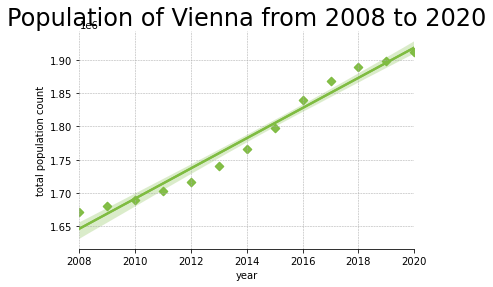

In [2]:
#Create overview of yearly change of total population
vie_pop_total_yearly = vie_pop.groupby(vie_pop["REF_DATE"].dt.year)["POP_TOTAL"].agg(["sum", "mean", "max"])
vie_pop_total_yearly.insert(0, "year", [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
sns.regplot(x = vie_pop_total_yearly["year"], y = vie_pop_total_yearly["sum"], color = (0.498, 0.737, 0.255, 0.8), ci = 80, marker = "D").set_title("Population of Vienna from 2008 to 2020", size = 24)
sns.regplot(x = vie_pop_total_yearly["year"], y = vie_pop_total_yearly["sum"], color = (0.498, 0.737, 0.255, 0.8), ci = 80, marker = "D").set_ylabel("total population count")
plt.grid(color = "darkgrey", linestyle = "--", linewidth = 0.5)
plt.rcParams['figure.dpi'] = 600
sns.despine(left = True)

### Considering migration background: A story of countless display attempts
In order to get to the point of graphically showing selected information, there were many attempts of translating a certain intention of display into a corresponding data selection. This analysis was built on the general attempt to automate the constructional work related to the data as much as possible. Nonetheless, as visible below, the intitial .csv-file was sometimes the direct source to extract certain information manually: in this case the row numbers in order to split the data frame according to the year of data collection.

The original approach for visualising the category of migration background relied on a similar graph layout as seen above, but the expressability of considering the development of each national affiliation over time did not bring great insight into further aspects of the data. That is why the decision was made, to select a single year for the analysis in order to make the insights into district relations and migration processes more concise. From now on, the portrayed data deals with the population counts of Vienna for the year 2020.

The following graph shows the entire Viennese population in 2020 and its distribution across the city according to the district of registration. The depiction makes graspable where both high and low population counts are found in the cityscape. At the same time the usage of district codes as a means of creating orientation could be criticised. For an audience who is familiar with the geographical structure as well as the cultural connotations of the disctricts this structure seems rather intuitive. In this analysis, the familiarity with the Viennese districts is implied. If the graphical displays were intended for another group of recipients, that is not used to perceiving the city split in its districts, then another aspect may be more suitable.

In [3]:
#Splitting vie_pop Dataframe manually by row index
vie_pop_2008 = vie_pop.iloc[:544,:].drop(columns = "REF_DATE")
vie_pop_2009 = vie_pop.iloc[544:1088,:].drop(columns = "REF_DATE")
vie_pop_2010 = vie_pop.iloc[1088:1628,:].drop(columns = "REF_DATE")
vie_pop_2011 = vie_pop.iloc[1628:2166,:].drop(columns = "REF_DATE")
vie_pop_2012 = vie_pop.iloc[2166:2665,:].drop(columns = "REF_DATE")
vie_pop_2013 = vie_pop.iloc[2665:3164,:].drop(columns = "REF_DATE")
vie_pop_2014 = vie_pop.iloc[3164:3663,:].drop(columns = "REF_DATE")
vie_pop_2015 = vie_pop.iloc[3663:4162,:].drop(columns = "REF_DATE")
vie_pop_2016 = vie_pop.iloc[4162:4660,:].drop(columns = "REF_DATE")
vie_pop_2017 = vie_pop.iloc[4660:5158,:].drop(columns = "REF_DATE")
vie_pop_2018 = vie_pop.iloc[5158:5656,:].drop(columns = "REF_DATE")
vie_pop_2019 = vie_pop.iloc[5656:6154,:].drop(columns = "REF_DATE")
vie_pop_2020 = vie_pop.iloc[6154:,:].drop(columns = "REF_DATE")

vie_pop_migrant_2020 = vie_pop_2020["POP_TOTAL"] - vie_pop_2020["POP_AUT"]

sns.set_context({"figure.figsize": (20, 12)})
top_plot = sns.barplot(x = vie_pop_2020["DISTRICT_CODE"], y = vie_pop_2020["POP_TOTAL"], color = ("#b8e186"), errcolor = "darkgrey")
bottom_plot = sns.barplot(x = vie_pop_2020["DISTRICT_CODE"], y = vie_pop_migrant_2020, palette = "spring", saturation = 0.7, errcolor = "darkgrey")

plt.xlabel("Viennese Districts", size = 12)
plt.ylabel("Total Population of the year 2020", size = 12)
plt.title("Population of Vienna in 2020 by district", size = 24)
plt.grid(color = "darkgrey", linestyle = "--", linewidth = 0.5)
plt.rcParams['figure.dpi'] = 600
plt.text(x = 5, y = 150, s = "population with migration backgrounds is placed on top\nof the 'non-migrant' population marked in green", horizontalalignment = "center", fontsize = 14, backgroundcolor = "0.75")
sns.despine(left = True)

In this graph the population which was marked as having a migration background is added as a layer on top of the Austrian population which is symbolised by the green-coloured bars. It is clear that if the population count of a district is rather high, the number of migrant population tends to behave accordingly. However, there are also deviations indicated, since some districts show a distinct relation of "non-migrant" and migrant backgrounds. This graph does not suitably portray these fine characteristics though, which is why the information on migration backgrounds used in the data set is analysed more thoroghly in the next displays. Then it is attempted to perceive the structures of different migration communities and the significance of certain Viennese districts for migration structures.


### A critical view on migrant background as a category
The central data set relies heavily on the category of migration background, whereas this terminology can be questioned from a cultural studies point of view. Therefore, two contemporary approaches to this category from Ethnologists are consulted in order to question this category’s purpose and possible implications. As Martin Sökefeld states (Schmidt-Lauber/Liebig 2022), migration background as a term leads to the *Mehrheitsgesellschaft* (German: "majority society") raising itself to be a norm, while migrants turn into a contrast, an excluded category. The possibility of subsequent discrimination is also recognised by Sabine Hess (Schmidt-Lauber/Liebig 2022), who critisizes the narrative, which conveys only by adapting given cultural norms, migrants will have the possibility of moving “up” into a normed, non-migrant category.

Furthermore, the idea could be explored that migration can be understood as an accumulation of complex processes and biographical stories. The sociologist Ludger Pries calls for such an approach by introducing the concept of so-called *Transnational social spaces* (Pries 1995), which describes the intents and everyday realities of migration in a differentiated manner. Additionally, the critical migration research, a branch of humanistic migration studies, challenges the point of outsourcing migration background as a category altogether. Instead, there should be an enclosing research attitude that simply considers migration as a factor in societal inquiry instead of splitting it off (Bojadžijev/Römhild 2014).

The representation of the multifaceted composition, which typically defines the population structure of a big city, is of course influcenced by the mode of data collection. In order to meet some of the critical considerations that were just outlined, a qualitative and close approach to migration processes and stories would seem like the obvious choice. Nevertheless, the quantitative depiction of the population, which applies a methodological approach relying more on generalisation in order to deal with wide-spread data, can still be held accountable for its argumentation, which in this instance uses a cultural term. Therefore, it can be challenged for its normative and assumptious conceptions as well as statements. 

With this in mind, the following graph is a critical, visual reminder to think in terms of migration backgrounds as a multifaceted, plural phenomenon. Each national affiliation, having been marked in the data set, is now displayed in another colour and its size is set in relation to the count of all other migration backgrounds. It becomes clear, that both the Austrian ("non-migrant") and a chunk of the population which is generalised as having an "other" migration background make up an overwaying part of the population. Considering the theoretical input from a cultural studies point of view, it seems important to note that the labelling of migration backgrounds was taken precisely from the data description of the curating magistrate. This labelling is up for questioning, in particual in regards to its functionality and possible narratives that give rise to creating a sense of *other* and acting normisingly.

In [4]:
vie_pop_2020.loc["Column_Total"] = vie_pop_2020.sum(numeric_only=True, axis = 0)
vie_pop_total_2020 = list(vie_pop_2020.loc["Column_Total"])
vie_pop_total_2020.remove(vie_pop_total_2020[0]); vie_pop_total_2020.remove(vie_pop_total_2020[0]); vie_pop_total_2020.remove(vie_pop_total_2020[0]); vie_pop_total_2020.remove(vie_pop_total_2020[0])
origins = ["Serbia/Montenegro", "Turkey", "Germany", "Poland", "Bosnia/Herzegovina", "Romania", "Hungary", "Syria", "Russia", "another country", "without foreign origin"]
piyg_deconstructed = [(0.557, 0.004, 0.322, 0.8), (0.773, 0.106, 0.49, 0.8), (0.871, 0.467, 0.682, 0.8), (0.945, 0.714, 0.855, 0.8), (0.992, 0.878, 0.937, 0.8), (0.969, 0.969, 0.969, 0.8),
                      (0.902, 0.961, 0.816, 0.8), (0.722, 0.882, 0.525, 0.8), (0.498, 0.737, 0.255, 0.8), (0.302, 0.573, 0.129, 0.8), (0.153, 0.392, 0.098, 0.8)]
squarify.plot(sizes = vie_pop_total_2020, label = origins, norm_x = 80, norm_y = 70, color = piyg_deconstructed, pad = False).set_title("Background distribution of Viennese population in 2020", size = 24)
plt.rcParams['figure.dpi'] = 600
plt.axis("off")

(0.0, 80.0, 0.0, 70.0)

### The appeal of a network depiction
Finally, the data set is approached by using a network depiction. Building on insights gained from the prior displays, there now is a more refined focus, when selecting parts of the data. The following network graph still portrays the population of Vienna in the year 2020, but enables greater expressability of the distribution of migration backgrounds as well as how certain migrant communities relate to particular districts.

For this portrayal, the population counts from 2020 were summed for each migration background including their according district belongings and then put into a seperate table. This was a necessary work step for creating usable coordinates for edge settings as shown in the code below. The network display focusses on showing the 20% of lowest ranking population counts split by migration backgrounds and district affiliation. Therefore the smallest, clearly identifiable clusters of migrants from a specific background become visible and assignable to the corresponding Viennese districts. This approach offers the possibility of highlighting communities in Vienna that may lack consideration when sought out through an extensive data set, since they simply tend to go under due to smaller counts.

Furthermore, this network display begins to explore the idea of regarding both communities within the poulation and districts as agents within a city as the overriding network. The edge width indicates the population count connecting two agents.

In [7]:
netlo = net.Network(height = 600, width = 600, notebook = True)
netlo.add_nodes([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], label = district_simple, color = ["#fffa00", "#fffa00", "#fffa00", "#fffa00", "#fffa00", "#fffa00",
                                                                                          "#fffa00", "#fffa00", "#fffa00", "#fffa00", "#fffa00", "#fffa00", "#fffa00", "#fffa00", "#fffa00", "#fffa00", "#fffa00",
                                                                                          "#fffa00", "#fffa00", "#fffa00", "#fffa00", "#fffa00", "#fffa00"])
netlo.add_nodes([24,25,26,27,28,29,30,31,32], label = origins[0:9], color = ["#8e0152", "#c51b7d", "#de77ae", "#f1b6da", "#fde0ef", "#f7f7f7","#e6f5d0", "#b8e186", "#7fbc41"])

#for lowest 20% population counts split by background and district, biggest clusters excl. AUT and Other backgrounds 
netlo.add_edges([(24,1,0.32), (24,8,0.35)])
netlo.add_edges([(25,2,0.13), (25,4,0.3), (25,6,0.32), (25,7,0.23), (25,8,0.15), (25,9,0.27), (25,13,0.26)])
netlo.add_edges([(27,1,0.21), (27,4,0.35), (27,7,0.26), (27,8,0.22)])
netlo.add_edges([(28,1,0.09), (28,4,0.23), (28,6,0.25), (28,7,0.26), (28,8,0.14), (28,9,0.32), (28,13,0.28),
                 (28,18,0.34)])
netlo.add_edges([(29,1,0.22), (29,6,0.31), (29,7,0.29), (29,8,0.18)])
netlo.add_edges([(30,1,0.2), (30,4,0.26), (30,6,0.28), (30,7,0.23), (30,8,0.2)])
netlo.add_edges([(31,1,0.06), (31,4,0.18), (31,6,0.1), (31,7,0.1), (31,8,0.06), (31,9,0.17), (31,13,0.19),
                 (31,18,0.3), (31,19,0.36)])
netlo.add_edges([(32,5,0.34), (32,6,0.22), (32,7,0.18), (32,8,0.2), (32,9,0.36), (32,13,0.32), (32,14,0.35),
                 (32,15,0.31), (32,16,0.33), (32,17,0.34), (32,18,0.34)])
netlo.repulsion(node_distance = 250, spring_length = 100)
netlo.show("netlo.html")

## Closing thoughts 
Other than contributing to this contemporary research area of critical cultural studies, this analysis is a first-time attempt of combining such a research topic with computational tools. The intent of this display is to show the outcome of the interplay of two aspects: knowledge from academic experience in cultural studies and experimenting with digital tools, in this case writing Python code. Therefore, the implementation of coding in order to gain insight into the data set and its implications was a dual exploration. The first-time experience of diving into code-writing hugely defined the work procedure that directed this analysis.

The choice of data set was very challenging in regards to selecting certain sections for individual research aspects. It is advantageous that the data set shows a variety of factors, as it can be applied in cultural research in diverse ways, for example through also considering the gender category that was not taken into account here at all. However, as an object for the first-time handling of a large data set, it sometimes felt a little too ambitious to have chosen the construct of 6654 rows by 19 columns with five categories of information (population count, locality, migration background, gender, time). Still, the understanding of the data set's abilities grew immensely through both trying and failing to gain specific insights into parts and connections of the data collection.

In conclusion, it was indeed possible to focus on information aspects of the data set in ways that truly satisfy the research attempt. Setting a focus was a procedual iteration that was supported by simply experimenting with the data set: from considering yearly developments to looking only at the year 2020 and also narrowing down the focus on smaller-sized migration backgrounds and therefore more particular communities in the cityscape. So much so, that the final graphical display seems downsized enough to hold a purposeful, concrete research topic in itself. This network display was also insightful by proving that interactivity is an engaging way of motivating the audience to seek out information.

The graphical displays in this analysis encourage the audience to rethink the usage of the term "migration background" and also point out dynamics of including and excluding parts of the population through certain categorical descriptions. By discussing the application of migration background in the data set, a continuing goal would be to propose further categories for collecting data, which are able to display more complex information on migration processes.

## Bibliography
>Bojadžijev, Manuela und Römhild, Regina (2014). Was kommt nach dem ‘transnational turn’? Perspektiven für eine kritische Migrationsforschung. In: *Vom Rand ins Zentrum. Perspektiven einer kritischen Migrationsforschung*. Herausgegeben von Labor Migration. Berlin: Panama. 10-24.

>Hess, Sabine (2022). Migration. In: *Begriffe der Gegenwart*. Ein kulturwissenschaftliches Glossar. Herausgegeben von Schmidt-Lauber, Brigitta und Liebig, Manuel. Wien/Köln: Böhlau. 187-194.

>Sökefeld, Martin (2022). Migrationshintergrund. In: *Begriffe der Gegenwart*. Ein kulturwissenschaftliches Glossar. Herausgegeben von Schmidt-Lauber, Brigitta und Liebig, Manuel. Wien/Köln: Böhlau. 195-203.

>Pries, Ludger (1995). Transnationale Soziale Räume – Theoretisch-empirische Skizze am Beispiel Mexiko – USA. In: *Zeitschrift für Soziologie* (25/6). 456-472.